## Importing the filtered data

In [1]:
import pandas as pd

Original_df = pd.read_csv('dse_training_data_filtered.csv')
Original_df.head(2)

,fullVisitorId,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,subcontinent,device_browser,device_operatingSystem,...,is_Safari,is_Firefox,is_Internet Explorer,is_Windows,is_Macintosh,is_iOS,is_Android,is_Chrome OS,is_Linux,is_Others_os
0,5576035078968099840,95.0,1.0,0.0,3.0,3.0,461.0,Southern Europe,Chrome,Windows,...,0,0,0,1,0,0,0,0,0,0
1,7201046511999320064,95.0,1.0,0.0,3.0,3.0,227.0,Eastern Asia,Other_browser,Windows,...,0,0,0,1,0,0,0,0,0,0


In [2]:
len(Original_df)

130875

## Removing unwanted columns

In [3]:
Original_df.columns

Index(['fullVisitorId', 'days_inactive', 'num_visits',
       'sum_transactionRevenue', 'hits', 'pageviews', 'timeOnSite',
       'subcontinent', 'device_browser', 'device_operatingSystem',
       'converted_label', 'num_visits_transformed', 'timeOnSite_hours',
       'timeOnSite_minutes', 'Continents', 'is_South & East Europe', 'is_Asia',
       'is_North & West Europe', 'is_Northern America', 'is_South America',
       'is_Australasia', 'is_Central America & Caribbean', 'is_Africa',
       'is_Other_continent', 'is_Chrome', 'is_Other_browser', 'is_Safari',
       'is_Firefox', 'is_Internet Explorer', 'is_Windows', 'is_Macintosh',
       'is_iOS', 'is_Android', 'is_Chrome OS', 'is_Linux', 'is_Others_os'],
      dtype='object')

In [4]:
df = Original_df.drop(columns = ['fullVisitorId', 'subcontinent', 'device_browser', 'device_operatingSystem', 'Continents'])
df.head(2)

,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,converted_label,num_visits_transformed,timeOnSite_hours,timeOnSite_minutes,...,is_Safari,is_Firefox,is_Internet Explorer,is_Windows,is_Macintosh,is_iOS,is_Android,is_Chrome OS,is_Linux,is_Others_os
0,95.0,1.0,0.0,3.0,3.0,461.0,0,0.0,0.0,7.0,...,0,0,0,1,0,0,0,0,0,0
1,95.0,1.0,0.0,3.0,3.0,227.0,0,0.0,0.0,3.0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130875 entries, 0 to 130874
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   days_inactive                   130875 non-null  float64
 1   num_visits                      130875 non-null  float64
 2   sum_transactionRevenue          130875 non-null  float64
 3   hits                            130875 non-null  float64
 4   pageviews                       130875 non-null  float64
 5   timeOnSite                      130875 non-null  float64
 6   converted_label                 130875 non-null  int64  
 7   num_visits_transformed          130875 non-null  float64
 8   timeOnSite_hours                130875 non-null  float64
 9   timeOnSite_minutes              130875 non-null  float64
 10  is_South & East Europe          130875 non-null  int64  
 11  is_Asia                         130875 non-null  int64  
 12  is_North & West 

## Normalizing the data

In [6]:
from sklearn.preprocessing import MinMaxScaler
import pickle

normalization_required = ['days_inactive', 'num_visits', 'sum_transactionRevenue', 'hits', 'pageviews', 'timeOnSite', 'timeOnSite_hours', 'timeOnSite_minutes']

min_max_scaler = MinMaxScaler()
scaled = min_max_scaler.fit_transform(df[normalization_required])

#Create a pickle file for min_max_scalar to be used later.
with open('min_max_scaler.pkl', 'wb') as picklefile:
    pickle.dump(min_max_scaler, picklefile)
    picklefile.close()

scaled = pd.DataFrame(scaled, columns = normalization_required)

for column in scaled.columns:
    df[column] = scaled[column]

df.head(2)

,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,converted_label,num_visits_transformed,timeOnSite_hours,timeOnSite_minutes,...,is_Safari,is_Firefox,is_Internet Explorer,is_Windows,is_Macintosh,is_iOS,is_Android,is_Chrome OS,is_Linux,is_Others_os
0,0.626667,0.0,0.0,0.001849,0.006768,0.020944,0,0.0,0.0,0.019126,...,0,0,0,1,0,0,0,0,0,0
1,0.626667,0.0,0.0,0.001849,0.006768,0.010313,0,0.0,0.0,0.008197,...,0,0,0,1,0,0,0,0,0,0


In [7]:
df.converted_label.value_counts()*100/len(df)

0    99.828844
1     0.171156
Name: converted_label, dtype: float64

## **1. Calculating feature importance**

- We can fit a LinearRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

- These coefficients can provide the basis for a crude feature importance score

1. Linear Regression Feature Importance

days_inactive Score = -0.005055714954758167
num_visits Score = 0.18156124248780048
sum_transactionRevenue Score = 0.7773698458818237
hits Score = 0.6699964328723033
pageviews Score = -0.5195087431048651
timeOnSite Score = -0.36683270018142666
num_visits_transformed Score = -0.052976999873603665
timeOnSite_hours Score = 0.6631504950245605
timeOnSite_minutes Score = 0.4848991331072017
is_South & East Europe Score = -1391657831.9398425
is_Asia Score = -1391657831.940142
is_North & West Europe Score = -1391657831.939768
is_Northern America Score = -1391657831.9385056
is_South America Score = -1391657831.9400122
is_Australasia Score = -1391657831.9403043
is_Central America & Caribbean Score = -1391657831.9401598
is_Africa Score = -1391657831.9394748
is_Other_continent Score = -1391657831.9386098
is_Chrome Score = 30667744252.40879
is_Other_browser Score = 30667744252.4091
is_Safari Score = 30667744252.407303
is_Firefox Score = 30667744252.408
is_Internet Explorer Score = 30667744252.4093
is

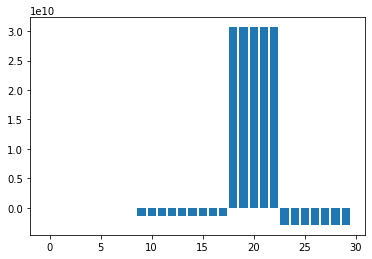

In [8]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df.drop(columns=['converted_label'])
y = df['converted_label']

model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X, y)

importance_LinearRegression = model_LinearRegression.coef_

for i,v in enumerate(importance_LinearRegression):
	#print('Feature: %0d, Score: %.5f' % (i,v))
	print(X.columns[i], "Score =", v)

plt.bar([x for x in range(len(importance_LinearRegression))], importance_LinearRegression)
plt.show()

2. Logistic Regression Feature Importance

days_inactive Score = -4.610534247145972
num_visits Score = 4.228258028995641
sum_transactionRevenue Score = 3.882577890691837
hits Score = 4.799857081566419
pageviews Score = 4.280944161760939
timeOnSite Score = 3.8920017617403677
num_visits_transformed Score = 1.4923797504573952
timeOnSite_hours Score = 1.2429254416849869
timeOnSite_minutes Score = 3.896469030581343
is_South & East Europe Score = -0.745720738395042
is_Asia Score = -0.7765807819995202
is_North & West Europe Score = -0.2934900424521715
is_Northern America Score = 2.369443041713713
is_South America Score = 0.1295680462613227
is_Australasia Score = -0.3101358716889483
is_Central America & Caribbean Score = -0.24716660206001545
is_Africa Score = -0.12372732067913153
is_Other_continent Score = -0.0021181889345609616
is_Chrome Score = 0.7032863530626368
is_Other_browser Score = -0.10466182911935984
is_Safari Score = -0.6983404007148767
is_Firefox Score = 0.20818810223006626
is_Internet Explorer Score = -0.10840068369281725


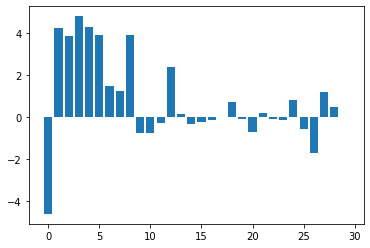

In [9]:
from sklearn.linear_model import LogisticRegression


model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X, y)

importance_LogisticRegression = model_LogisticRegression.coef_[0]

for i,v in enumerate(importance_LogisticRegression):
	#print('Feature: %0d, Score: %.5f' % (i,v))
	print(X.columns[i], "Score =", v)

plt.bar([x for x in range(len(importance_LogisticRegression))], importance_LogisticRegression)
plt.show()

3. Decision Tree Feature Importance

days_inactive Score = 0.12320375040612286
num_visits Score = 0.023045302040389907
sum_transactionRevenue Score = 0.03683845152598935
hits Score = 0.062458918520176716
pageviews Score = 0.40921347886850984
timeOnSite Score = 0.2091975736622773
num_visits_transformed Score = 0.01791837258497403
timeOnSite_hours Score = 0.0
timeOnSite_minutes Score = 0.07232435537734903
is_South & East Europe Score = 0.0
is_Asia Score = 0.0
is_North & West Europe Score = 0.0
is_Northern America Score = 0.0018333592115709041
is_South America Score = 0.0003199438835763866
is_Australasia Score = 0.0
is_Central America & Caribbean Score = 0.0
is_Africa Score = 0.0
is_Other_continent Score = 0.0
is_Chrome Score = 0.004932273059109214
is_Other_browser Score = 0.0009237881132494651
is_Safari Score = 0.003608550479955428
is_Firefox Score = 0.0053236587792886885
is_Internet Explorer Score = 0.0
is_Windows Score = 0.00614031101531718
is_Macintosh Score = 0.008011626865260307
is_iOS Score = 0.004308842378369462
is_A

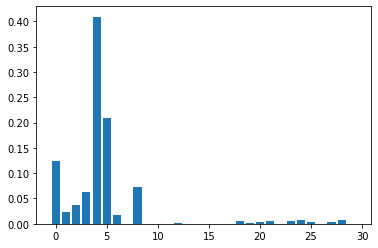

In [10]:
from sklearn.tree import DecisionTreeClassifier


model_DecisionTreeClassifier= DecisionTreeClassifier()
model_DecisionTreeClassifier.fit(X, y)

importance_DecisionTreeClassifier = model_DecisionTreeClassifier.feature_importances_

for i,v in enumerate(importance_DecisionTreeClassifier):
	#print('Feature: %0d, Score: %.5f' % (i,v))
	print(X.columns[i], "Score =", v)

plt.bar([x for x in range(len(importance_DecisionTreeClassifier))], importance_DecisionTreeClassifier)
plt.show()


4. Random Forect classifier


days_inactive Score = 0.14973346691995748
num_visits Score = 0.03542707053815445
sum_transactionRevenue Score = 0.05004890030415664
hits Score = 0.12955782683174
pageviews Score = 0.2051495915571503
timeOnSite Score = 0.2448876453453428
num_visits_transformed Score = 0.03514085150458393
timeOnSite_hours Score = 0.010457459443777501
timeOnSite_minutes Score = 0.09876401924735963
is_South & East Europe Score = 0.00038673159791474204
is_Asia Score = 0.001260325350234831
is_North & West Europe Score = 0.0009258983883296858
is_Northern America Score = 0.004212875509629952
is_South America Score = 0.0010594743902075997
is_Australasia Score = 0.0002367332192355161
is_Central America & Caribbean Score = 8.195477347255129e-05
is_Africa Score = 4.964446154622681e-05
is_Other_continent Score = 2.7057715054701246e-09
is_Chrome Score = 0.0029724172308660595
is_Other_browser Score = 0.0009572995424911333
is_Safari Score = 0.0017891347032999623
is_Firefox Score = 0.002605807939014028
is_Internet Expl

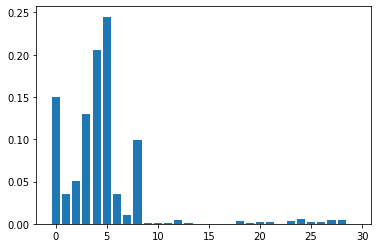

In [11]:
from sklearn.ensemble import RandomForestClassifier

model_RandomForestClassifier= RandomForestClassifier()
model_RandomForestClassifier.fit(X, y)

importance_RandomForestClassifier = model_RandomForestClassifier.feature_importances_

for i,v in enumerate(importance_RandomForestClassifier):
	#print('Feature: %0d, Score: %.5f' % (i,v))
	print(X.columns[i], "Score =", v)

plt.bar([x for x in range(len(importance_RandomForestClassifier))], importance_RandomForestClassifier)
plt.show()

5. XGBoost Classifier Feature Importance

C:\Users\Sahil\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
days_inactive Score = 0.048398603
num_visits Score = 0.028682025
sum_transactionRevenue Score = 0.03367442
hits Score = 0.036254033
pageviews Score = 0.18681882
timeOnSite Score = 0.03523032
num_visits_transformed Score = 0.0
timeOnSite_hours Score = 0.0
timeOnSite_minutes Score = 0.0
is_South & East Europe Score = 0.0
is_Asia Score = 0.013489964
is_North & West Europe Score = 0.0
is_Northern America Score = 0.1894482
is_South America Score = 0.0
is_Australasia Score = 0.0
is_Central America & Caribbean Score = 0.0
is_Africa Score = 0.0
is_Other_continent Score = 0.0
is_Chrome Score = 0.06251572
is_Other_browser Score = 0.0
is_Safari Score = 0.07901742
is_Firefox Score = 0.0
is_Int

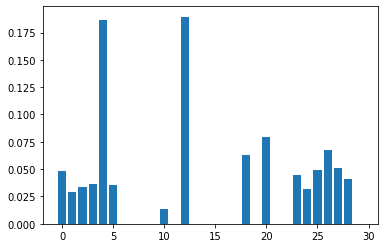

In [12]:
from xgboost import XGBClassifier

model_XGBClassifier= XGBClassifier()
model_XGBClassifier.fit(X, y)

importance_XGBClassifier = model_XGBClassifier.feature_importances_

for i,v in enumerate(importance_XGBClassifier):
	#print('Feature: %0d, Score: %.5f' % (i,v))
	print(X.columns[i], "Score =", v)

plt.bar([x for x in range(len(importance_XGBClassifier))], importance_XGBClassifier)
plt.show()

days_inactive Score = -0.09278741918382677
num_visits Score = 0.7529809981673956
sum_transactionRevenue Score = 0.8053484918551238
hits Score = 1.1935769757341577
pageviews Score = 0.9379302187962147
timeOnSite Score = 0.6993045529826228
num_visits_transformed Score = -0.37478546289069914
timeOnSite_hours Score = 2.735731613569651
timeOnSite_minutes Score = 0.7122987484694875
is_South & East Europe Score = -0.04323172489129482
is_Asia Score = 0.001866347454909545
is_North & West Europe Score = -0.0036211897178177743
is_Northern America Score = 0.03710705975274209
is_South America Score = 0.007879507401446828
is_Australasia Score = 0.0
is_Central America & Caribbean Score = 0.0
is_Africa Score = 0.0
is_Other_continent Score = 0.0
is_Chrome Score = 0.0025084993552013657
is_Other_browser Score = -0.004607133860065504
is_Safari Score = -0.013345059349559207
is_Firefox Score = 0.0055639013877173404
is_Internet Explorer Score = 0.009879792466704784
is_Windows Score = -0.0063269342967338105
i

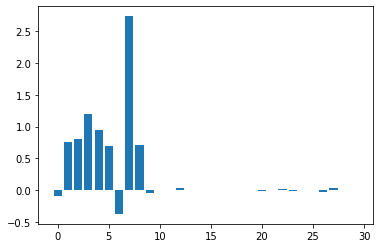

In [13]:
from sklearn.svm import SVC

model_SVC= SVC(kernel='linear')
model_SVC.fit(X, y)

importance_SVC = model_SVC.coef_[0]

for i,v in enumerate(importance_SVC):
	#print('Feature: %0d, Score: %.5f' % (i,v))
	print(X.columns[i], "Score =", v)

plt.bar([x for x in range(len(importance_SVC))], importance_SVC)
plt.show()

In [14]:
importance_variable = pd.DataFrame([importance_LogisticRegression, 
importance_DecisionTreeClassifier, 
importance_RandomForestClassifier, 
importance_XGBClassifier, 
importance_SVC], columns=X.columns)


importance_variable.index = ['LogisticRegression', 'DecisionTreeClassifier','RandomForestClassifier','XGBClassifier','SVC']
importance_variable

,days_inactive,num_visits,sum_transactionRevenue,hits,pageviews,timeOnSite,num_visits_transformed,timeOnSite_hours,timeOnSite_minutes,is_South & East Europe,...,is_Safari,is_Firefox,is_Internet Explorer,is_Windows,is_Macintosh,is_iOS,is_Android,is_Chrome OS,is_Linux,is_Others_os
LogisticRegression,-4.610534,4.228258,3.882578,4.799857,4.280944,3.892002,1.492380,1.242925,3.896469,-0.745721,...,-0.698340,0.208188,-0.108401,-0.146340,0.827719,-0.577970,-1.724886,1.170761,0.469674,-1.888675e-02
DecisionTreeClassifier,0.123204,0.023045,0.036838,0.062459,0.409213,0.209198,0.017918,0.000000,0.072324,0.000000,...,0.003609,0.005324,0.000000,0.006140,0.008012,0.004309,0.000042,0.002909,0.007446,0.000000e+00
RandomForestClassifier,0.149733,0.035427,0.050049,0.129558,0.205150,0.244888,0.035141,0.010457,0.098764,0.000387,...,0.001789,0.002606,0.000049,0.003720,0.006136,0.002447,0.002537,0.004528,0.004877,3.322477e-07
XGBClassifier,0.048399,0.028682,0.033674,0.036254,0.186819,0.035230,0.000000,0.000000,0.000000,0.000000,...,0.079017,0.000000,0.000000,0.044723,0.031841,0.049433,0.067924,0.051228,0.041321,0.000000e+00
SVC,-0.092787,0.752981,0.805348,1.193577,0.937930,0.699305,-0.374785,2.735732,0.712299,-0.043232,...,-0.013345,0.005564,0.009880,-0.006327,0.008490,-0.004783,-0.032179,0.029700,0.005099,0.000000e+00


Analyse each column for its contribution towards the labels

In [15]:
importance_variable.columns

Index(['days_inactive', 'num_visits', 'sum_transactionRevenue', 'hits',
       'pageviews', 'timeOnSite', 'num_visits_transformed', 'timeOnSite_hours',
       'timeOnSite_minutes', 'is_South & East Europe', 'is_Asia',
       'is_North & West Europe', 'is_Northern America', 'is_South America',
       'is_Australasia', 'is_Central America & Caribbean', 'is_Africa',
       'is_Other_continent', 'is_Chrome', 'is_Other_browser', 'is_Safari',
       'is_Firefox', 'is_Internet Explorer', 'is_Windows', 'is_Macintosh',
       'is_iOS', 'is_Android', 'is_Chrome OS', 'is_Linux', 'is_Others_os'],
      dtype='object')

<ipython-input-16-aa32067d29bc>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 5))


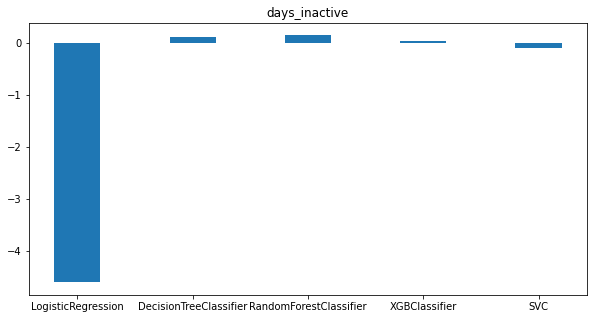

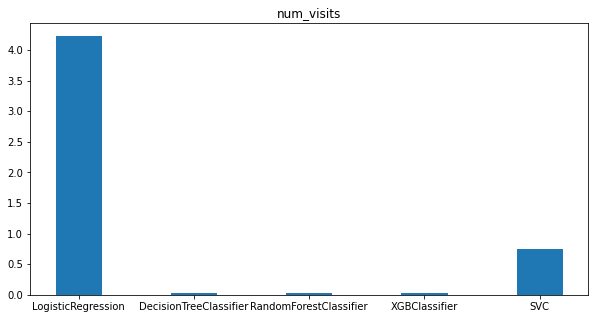

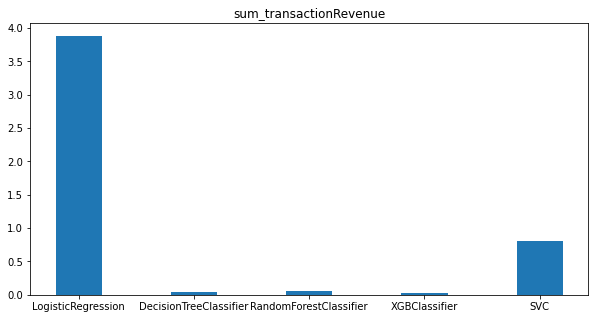

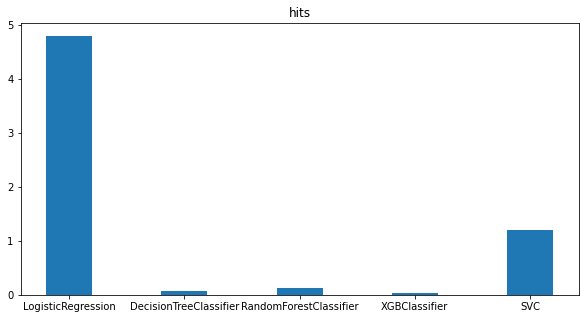

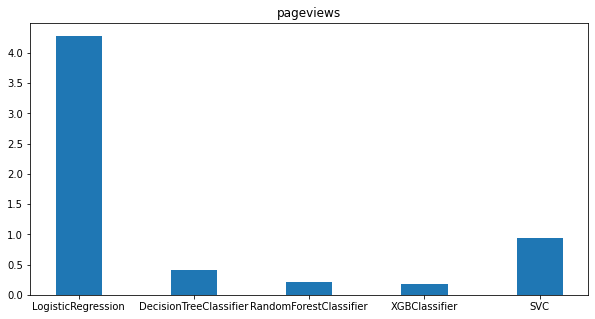

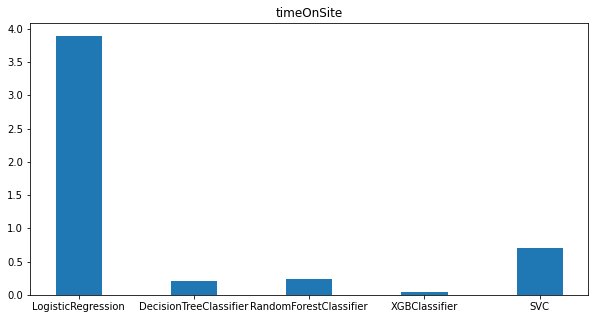

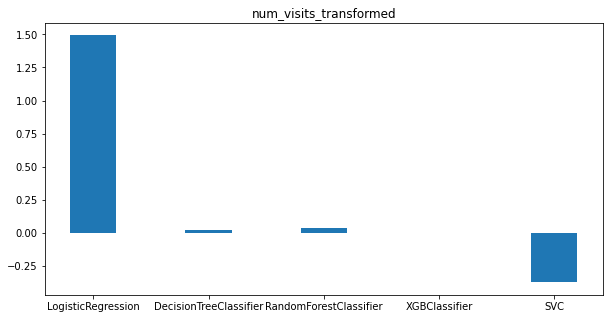

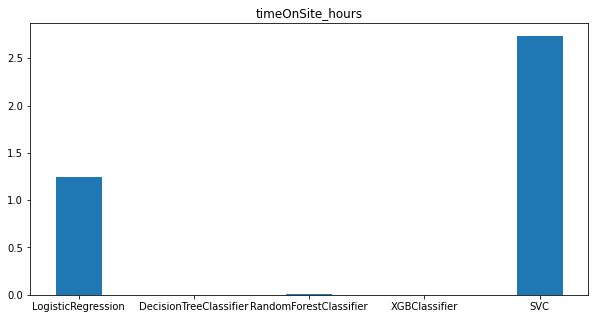

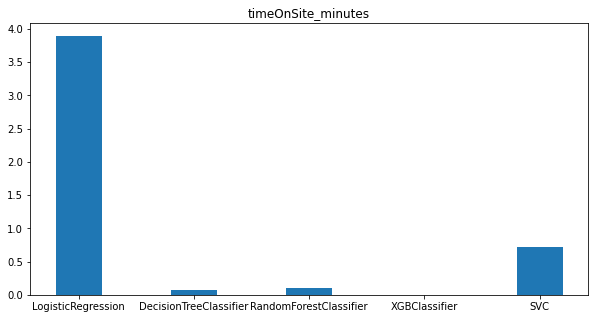

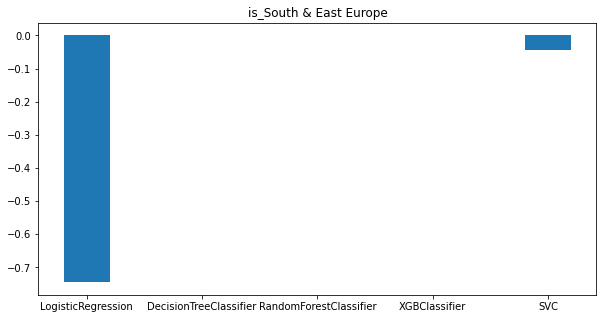

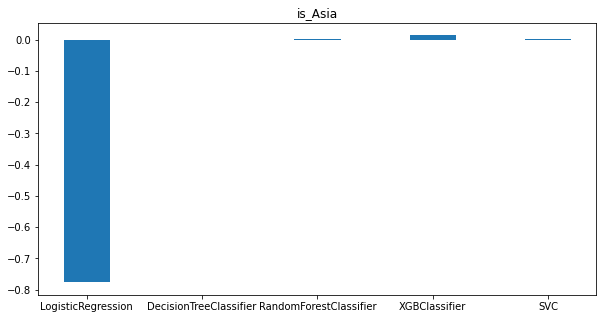

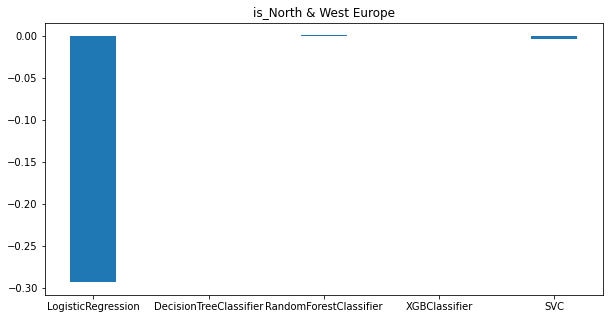

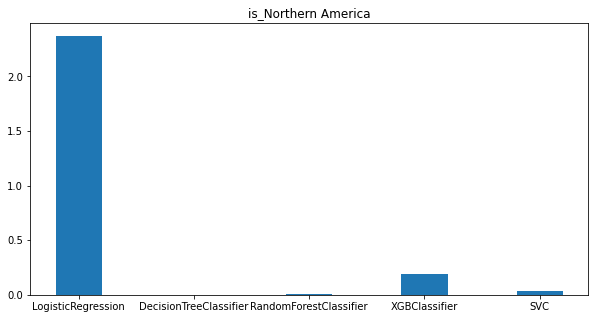

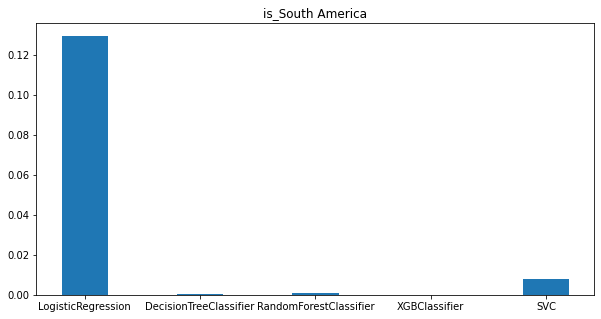

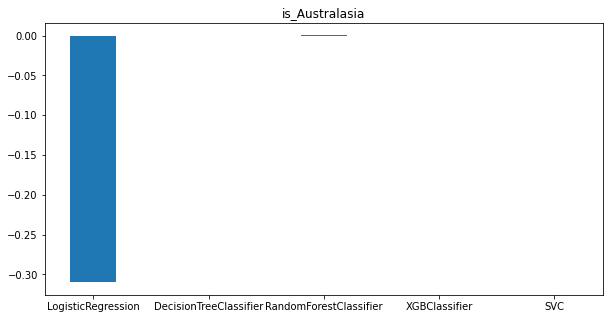

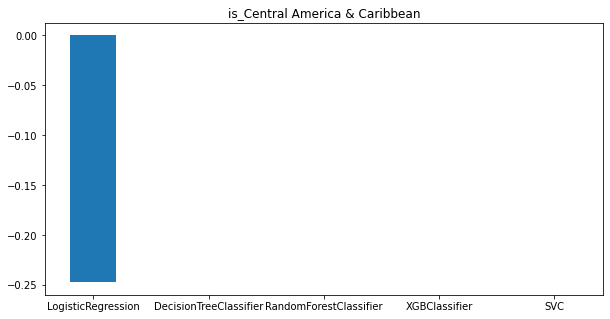

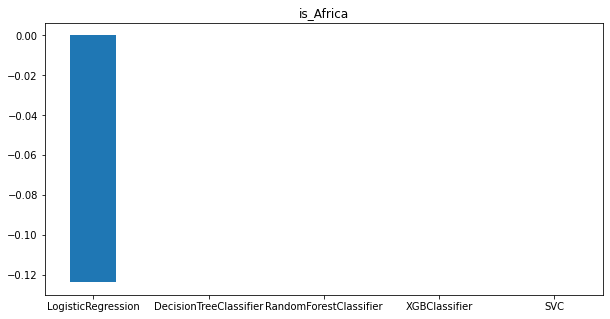

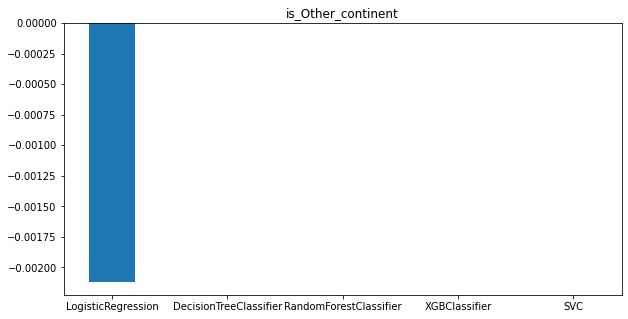

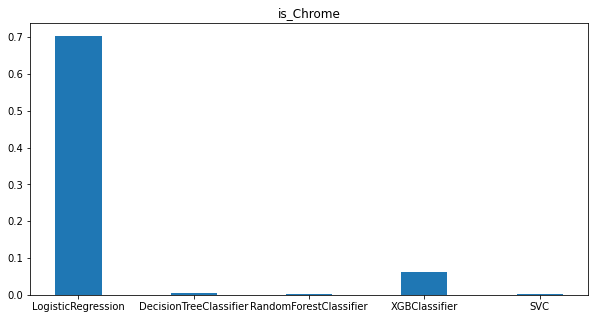

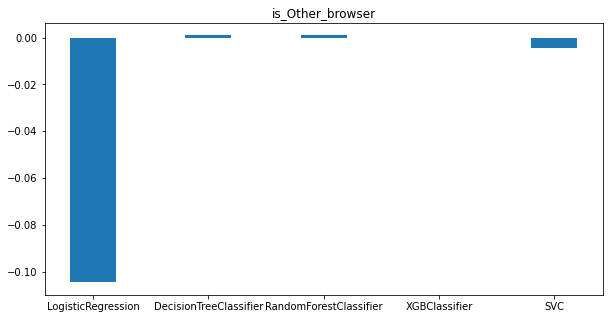

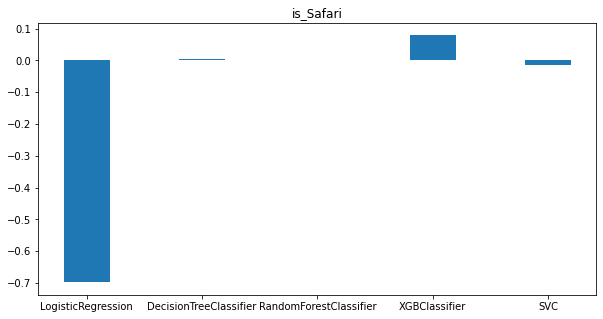

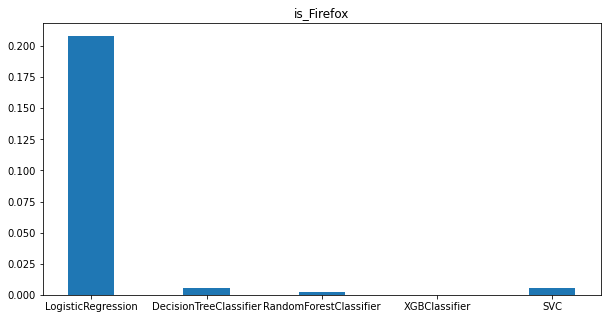

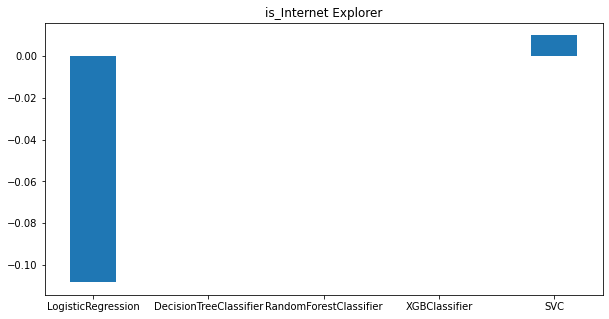

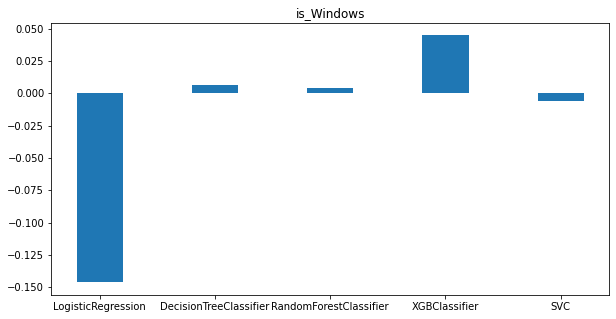

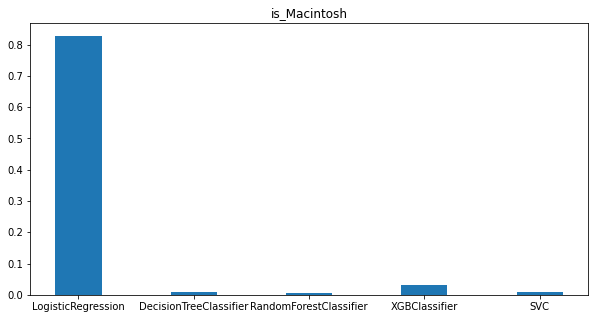

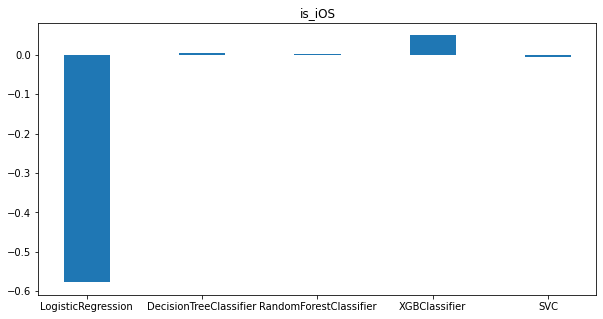

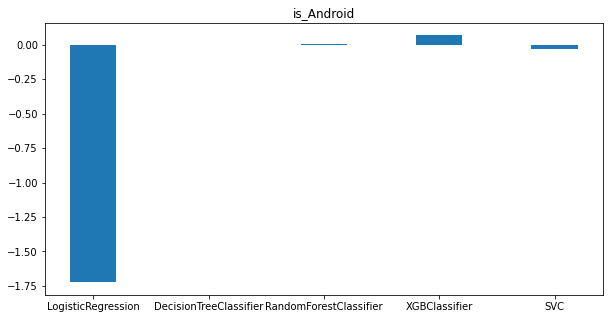

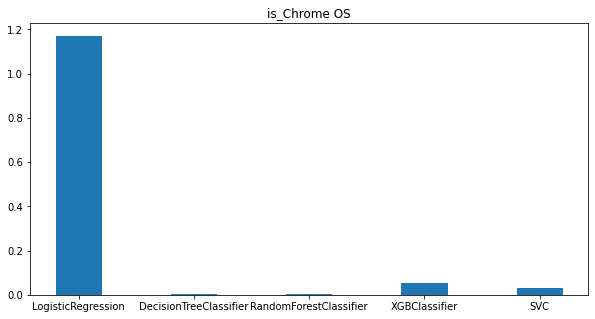

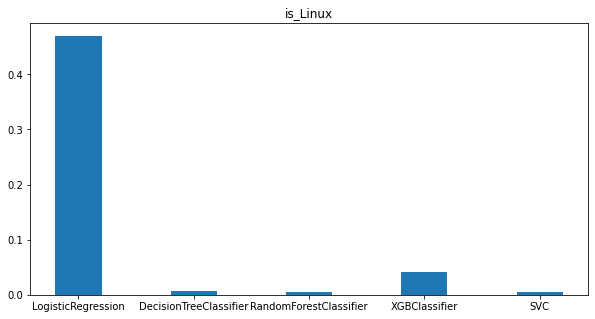

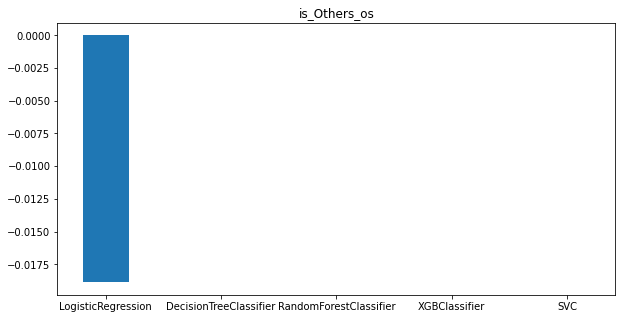

In [16]:
for col in importance_variable.columns:
    fig = plt.figure(figsize=(10, 5))

    # creating the bar plot
    plt.bar(importance_variable.index, importance_variable[col], width = 0.4)
    plt.title(col)

<ipython-input-17-6cb6c0fef62c>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 5))


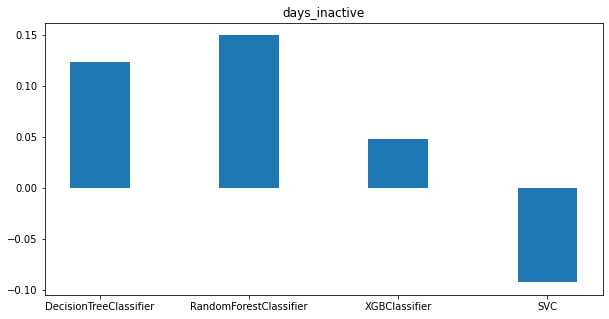

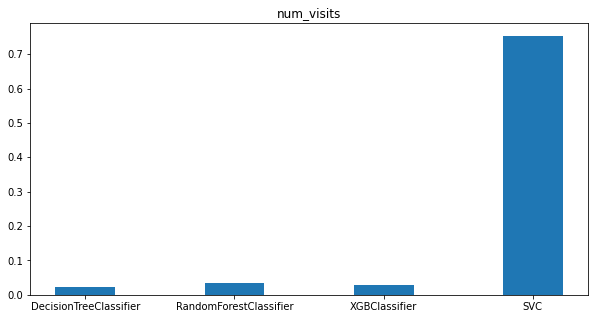

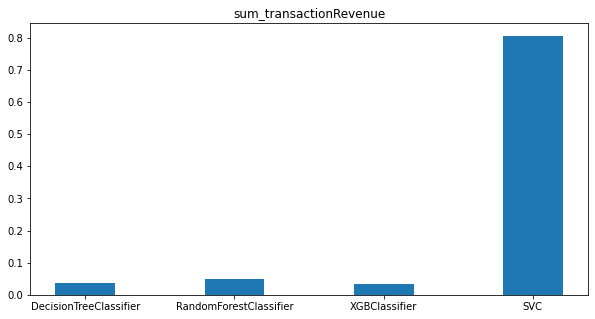

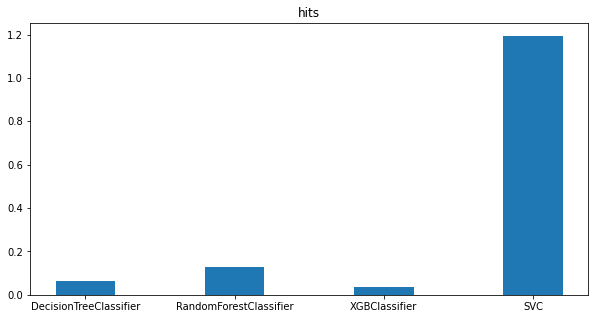

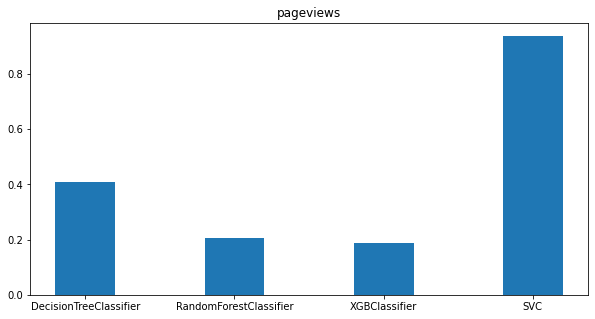

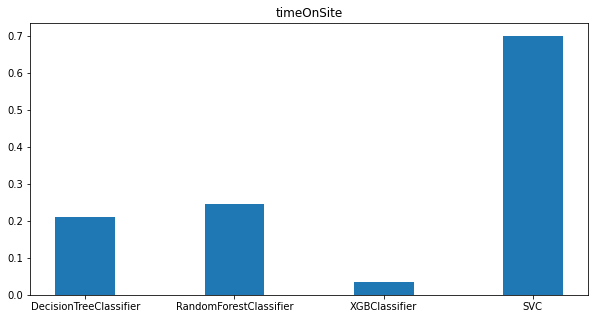

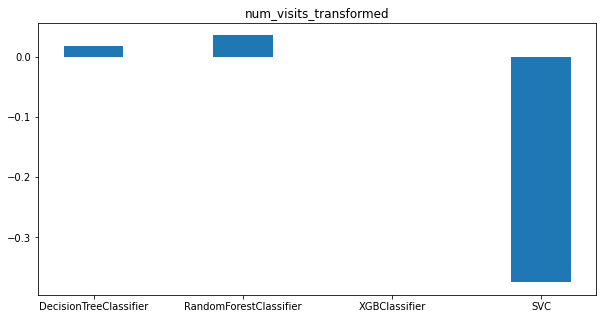

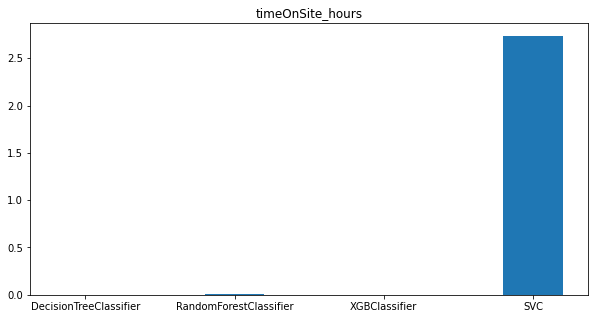

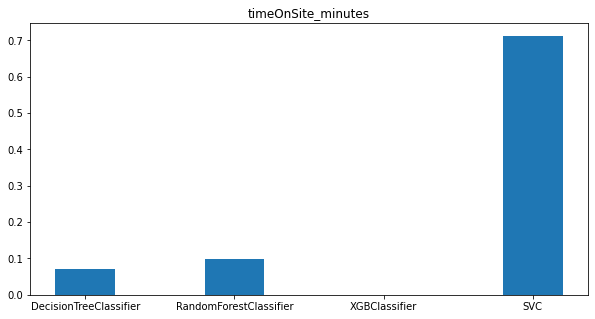

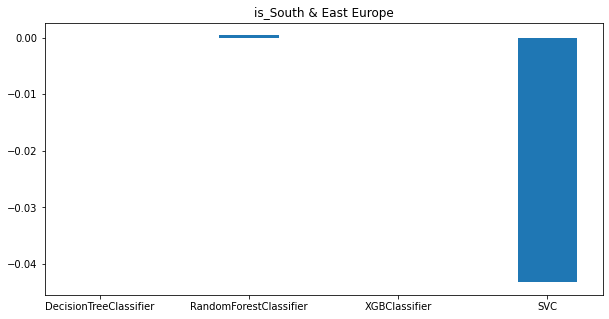

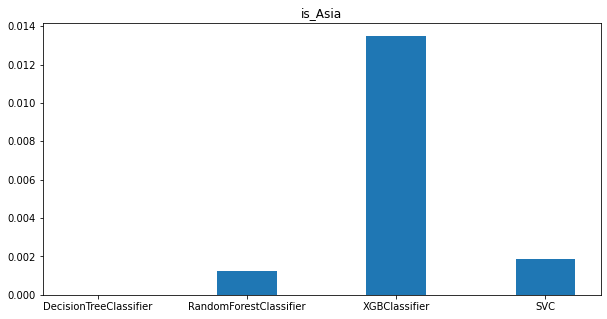

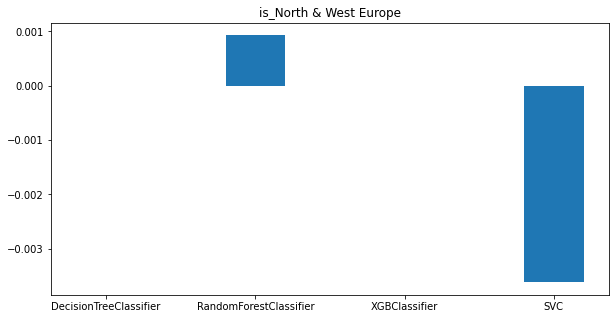

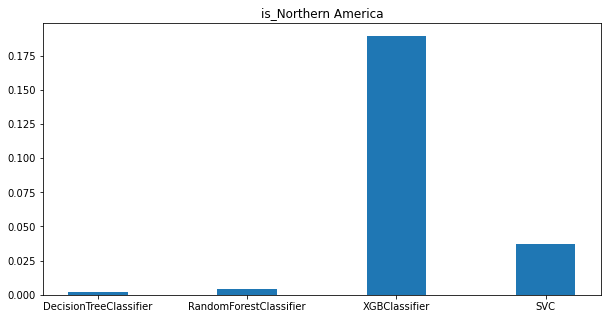

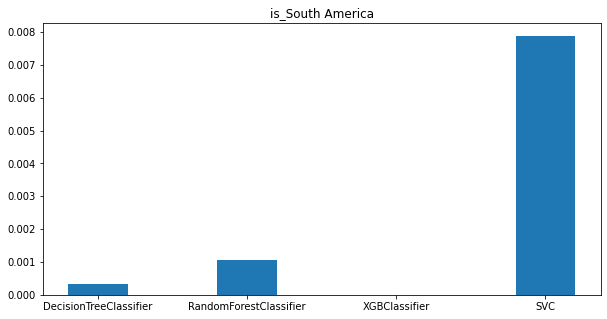

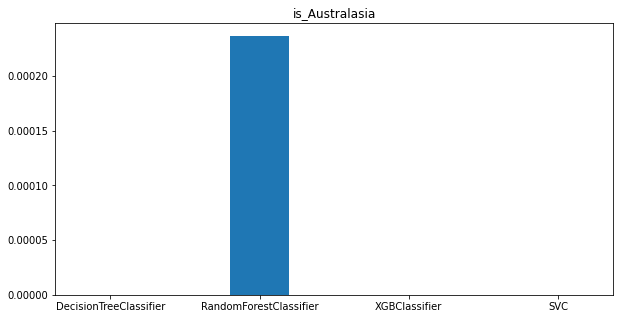

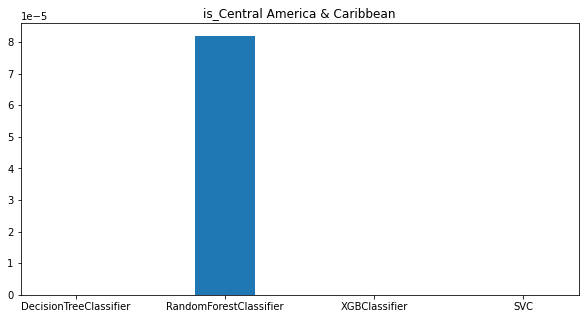

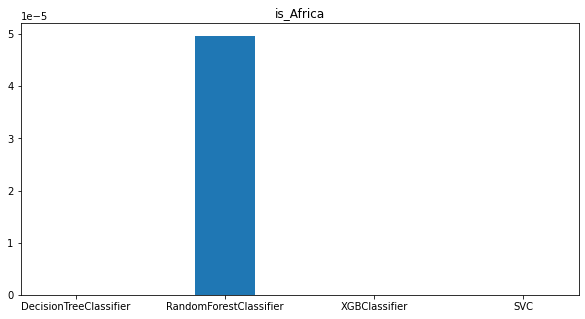

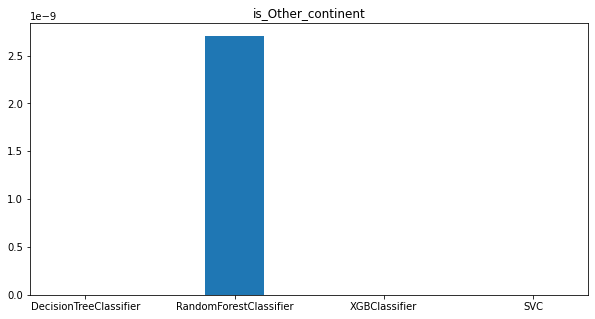

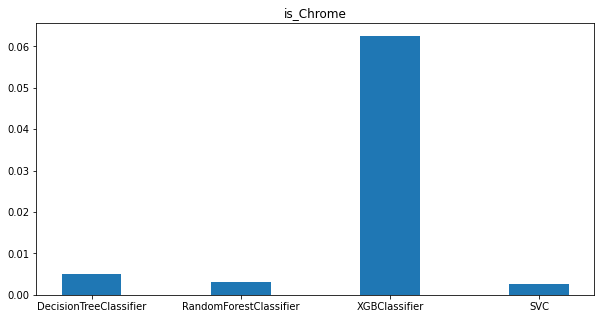

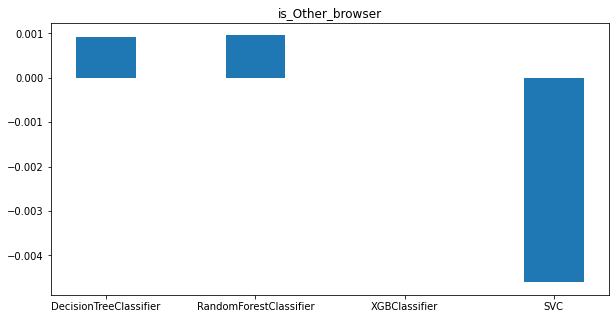

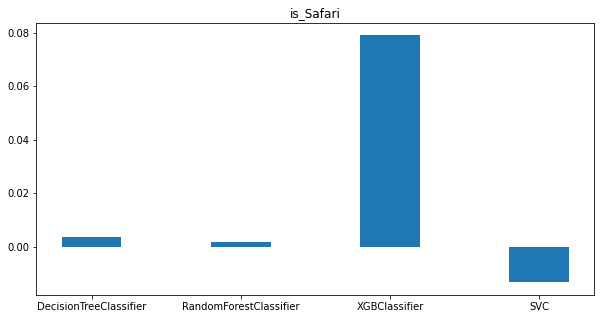

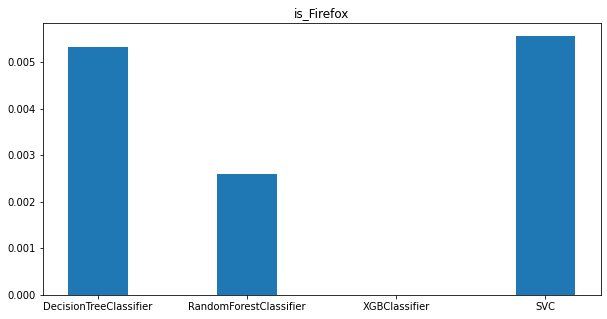

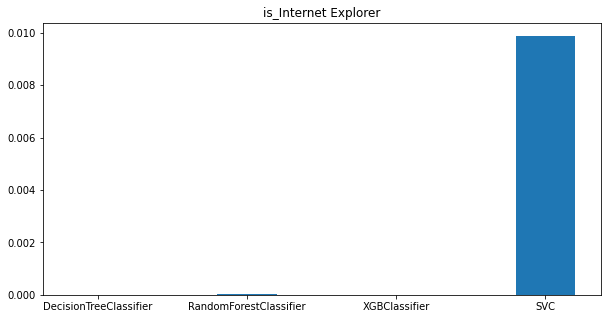

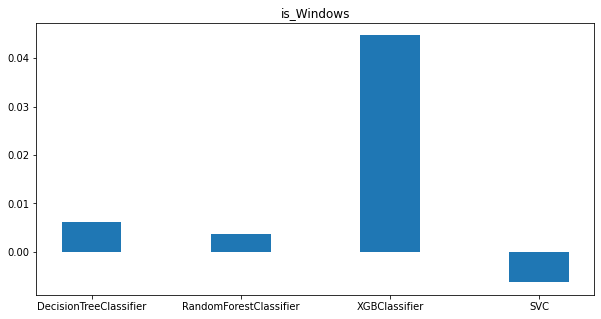

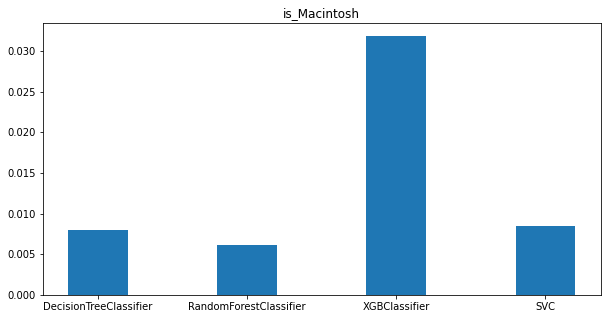

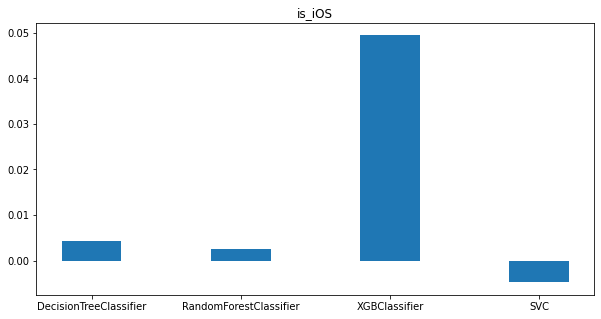

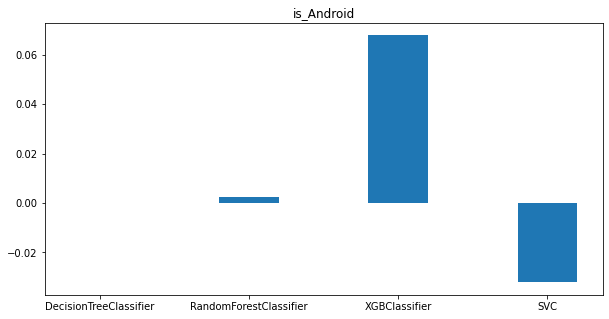

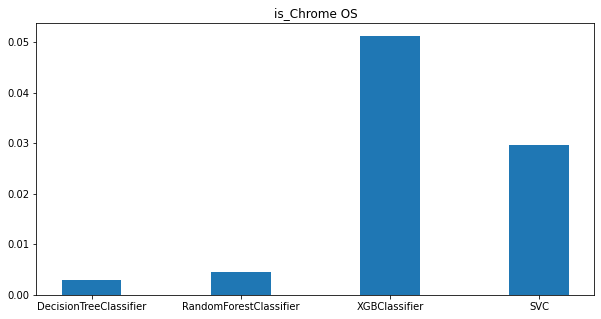

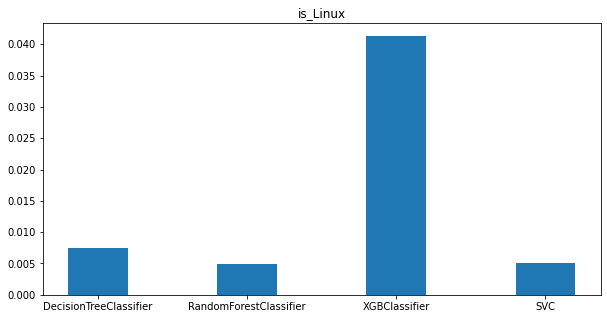

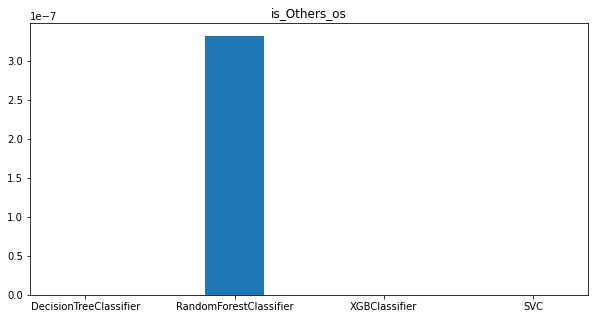

In [17]:
#Removing importance for Logistic regression
importance_variable = pd.DataFrame([importance_DecisionTreeClassifier, 
importance_RandomForestClassifier, 
importance_XGBClassifier, 
importance_SVC], columns=X.columns)


importance_variable.index = ['DecisionTreeClassifier','RandomForestClassifier','XGBClassifier','SVC']
for col in importance_variable.columns:
    fig = plt.figure(figsize=(10, 5))

    # creating the bar plot
    plt.bar(importance_variable.index, importance_variable[col], width = 0.4)
    plt.title(col)

- Based on the analysis in the above cells we can conclude that the following features can be removed as they do not contribute much significance.

In [18]:
to_remove = ['num_visits_transformed', 'is_South & East Europe', 'is_Asia', 'is_North & West Europe', 'is_South America', 'is_Australasia', 'is_Central America & Caribbean', 'is_Africa', 'is_Other_continent', 'is_Chrome', 'is_Safari', 'is_Firefox',
       'is_Internet Explorer','is_Other_browser','is_Windows', 'is_Macintosh', 'is_iOS','is_Android','is_Chrome OS', 'is_Linux', 'is_Others_os']

len(to_remove)

21

In [19]:
df.drop(columns = to_remove).to_csv('dse_training_data_important_features.csv', index = False)